# Machine Learning on Diabetes Data in Python

## Phase 0 — Data Preparation
### 768 Females of Pima Indian Heritage

We have 768 instances and the following 8 attributes:

    Number of times pregnant (preg)
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
    Diastolic blood pressure in mm Hg (pres)
    Triceps skin fold thickness in mm (skin)
    2-Hour serum insulin in mu U/ml (insu)
    Body mass index measured as weight in kg/(height in m)^2 (mass)
    Diabetes pedigree function (pedi)
    Age in years (age)
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

### https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

## Phase 1 — Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=column_names)

In [2]:
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# count the zero values for each column 
diabetes.groupby('Outcome').agg(lambda x: x.eq(0).sum())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,73,3,19,139,236,9.0,0.0,0
1,38,2,16,88,138,2.0,0.0,0


In [5]:
dataset2 = diabetes.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
listOfColumns = diabetes.columns.tolist()
listOfColumns = listOfColumns[0:8]
more_stat=diabetes[listOfColumns].agg(['median','mad','sem','skew', 'kurt'])
more_stat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
mad,2.771620,25.181793,12.639425,13.659627,84.505079,5.842270,0.247309,9.586405
sem,0.121589,1.153712,0.698443,0.575626,4.158510,0.284495,0.011956,0.424361
skew,0.901674,0.173754,-1.843608,0.109372,2.272251,-0.428982,1.919911,1.129597
kurt,0.159220,0.640780,5.180157,-0.520072,7.214260,3.290443,5.594954,0.643159


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

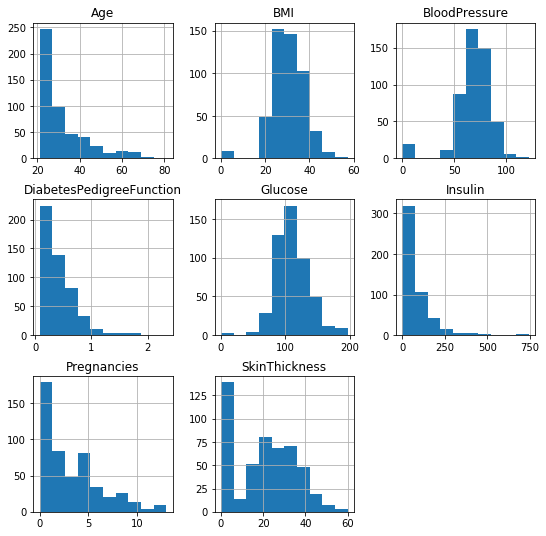

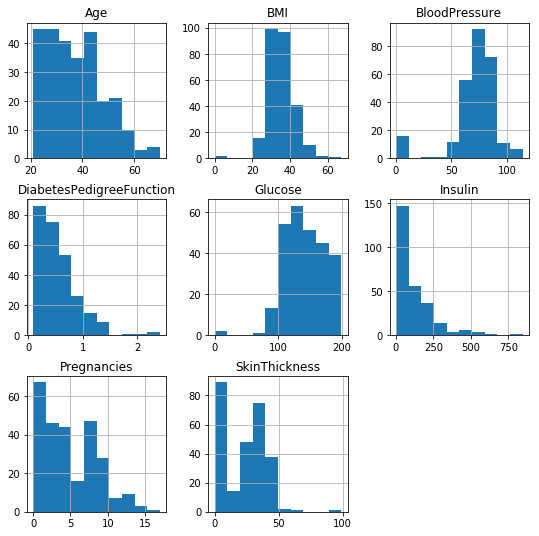

In [9]:
diabetes.groupby("Outcome").hist(figsize=(9, 9))

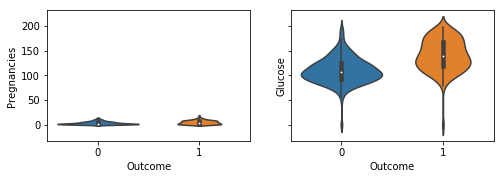

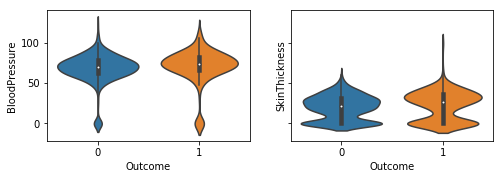

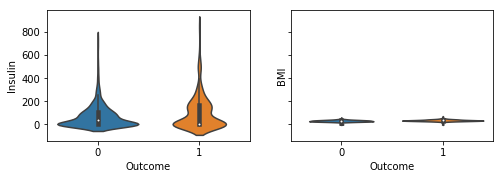

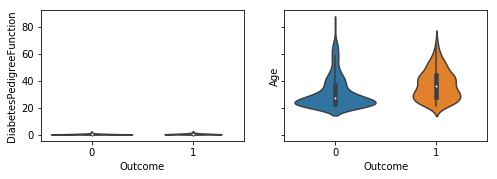

In [10]:
# https://www.kaggle.com/dbsnail/diabetes-prediction-over-0-86-accuracy
# create a violin plot 

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = diabetes.Outcome, y=diabetes[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break



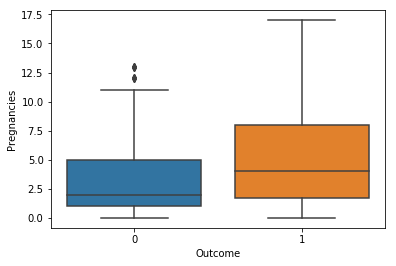

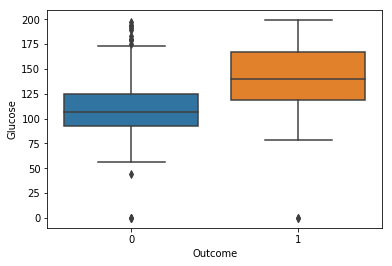

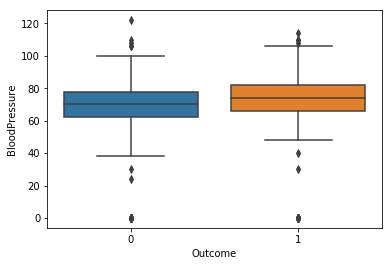

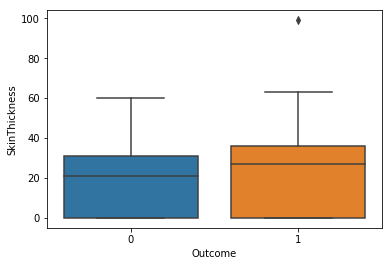

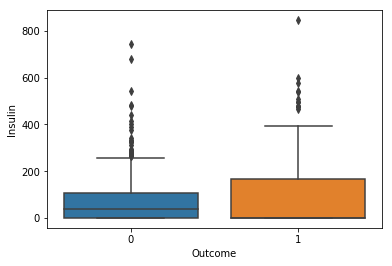

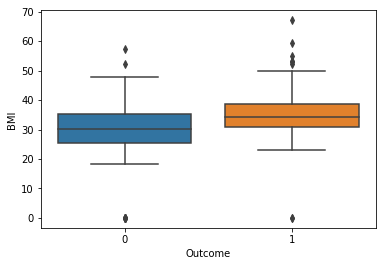

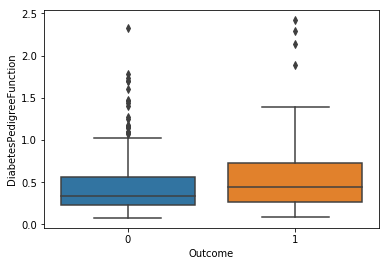

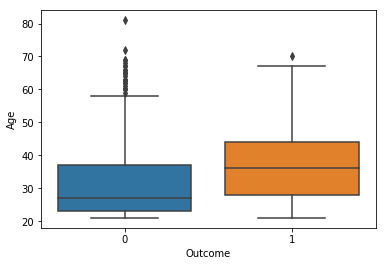

In [11]:

feature_names = diabetes.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Outcome', y=feature_names[i], data=diabetes)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

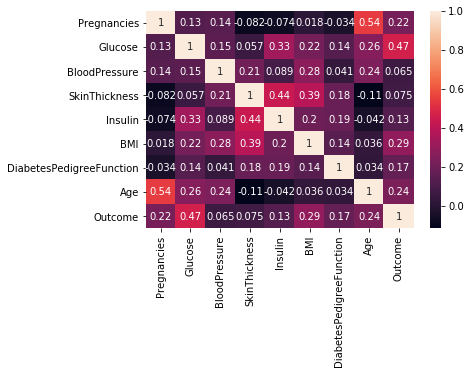

In [12]:
# finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

corr = diabetes.corr()
print(corr)
sns.heatmap(corr, annot = True,
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16
In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

## Phase 2— Data Cleaning
### There are several factors to consider in the data cleaning process.

    Duplicate or irrelevant observations.
    Bad labeling of data, same category occurring multiple times.
    Missing or null data points.
    Unexpected outliers.

In [13]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here are several ways to handle invalid data values :

    Ignore/remove these cases : This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns means have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.
    Put average/mean values : This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.
    Avoid using features : It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but its hard to predict that.

In [14]:
# remove the Outlier of skin thickness

max_skinthickness = diabetes.SkinThickness.max()
diabetes_clean = diabetes[diabetes.SkinThickness!=max_skinthickness]

In [15]:
diabetes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 767 non-null int64
Glucose                     767 non-null int64
BloodPressure               767 non-null int64
SkinThickness               767 non-null int64
Insulin                     767 non-null int64
BMI                         767 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null int64
Outcome                     767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 59.9 KB


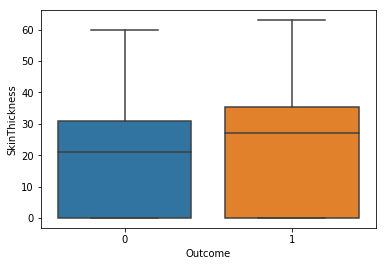

In [16]:
sns.boxplot(x='Outcome', y=feature_names[3], data=diabetes_clean)

In [17]:
# Cleaning method 1
# Remove Rows With Missing Values
diabetes_clean_m1= diabetes_clean.replace(0, np.NaN)
diabetes_clean_m1.dropna(inplace=True)
diabetes_clean_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 755
Data columns (total 9 columns):
Pregnancies                 111 non-null float64
Glucose                     111 non-null float64
BloodPressure               111 non-null float64
SkinThickness               111 non-null float64
Insulin                     111 non-null float64
BMI                         111 non-null float64
DiabetesPedigreeFunction    111 non-null float64
Age                         111 non-null int64
Outcome                     111 non-null float64
dtypes: float64(8), int64(1)
memory usage: 8.7 KB


In [18]:
diabetes_clean_m1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1.0
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1.0


In [19]:
# Cleaning method 2
# To reduce the influence of meaningless values, we used the mean column value to replace all missing values
diabetes_clean_m2= diabetes_clean.replace(0, np.NaN)
diabetes_clean_m2.fillna(diabetes_clean.mean(), inplace=True)
diabetes_clean_m2.info()
diabetes_clean_m2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 767 non-null float64
Glucose                     767 non-null float64
BloodPressure               767 non-null float64
SkinThickness               767 non-null float64
Insulin                     767 non-null float64
BMI                         767 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null int64
Outcome                     767 non-null float64
dtypes: float64(8), int64(1)
memory usage: 79.9 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,4.404260,121.582759,72.257693,26.481818,118.761425,32.447822,0.471742,33.203390,0.575039
std,2.984782,30.333906,12.123577,9.294927,93.109342,6.879383,0.331524,11.721879,0.310744
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348110
25%,2.000000,99.500000,64.000000,20.434159,79.903520,27.500000,0.243500,24.000000,0.348110
50%,3.847458,117.000000,72.000000,23.000000,79.903520,32.000000,0.371000,29.000000,0.348110
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
diabetes_clean_m2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.90352,33.6,0.627,50,1.00000
1,1.000000,85.0,66.0,29.000000,79.90352,26.6,0.351,31,0.34811
2,8.000000,183.0,64.0,20.434159,79.90352,23.3,0.672,32,1.00000
3,1.000000,89.0,66.0,23.000000,94.00000,28.1,0.167,21,0.34811
4,3.847458,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1.00000


In [21]:
# Cleaning method 3
# We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.
# others columns used the mean value to replace all missing values

diabetes_clean_m3 = diabetes_clean[(diabetes_clean.BloodPressure != 0) & (diabetes_clean.BMI != 0) & (diabetes_clean.Glucose != 0)]
diabetes_clean_m3.fillna(diabetes_clean.mean(), inplace=True)
diabetes_clean_m3.shape
diabetes_clean_m3.info()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 723 non-null int64
Glucose                     723 non-null int64
BloodPressure               723 non-null int64
SkinThickness               723 non-null int64
Insulin                     723 non-null int64
BMI                         723 non-null float64
DiabetesPedigreeFunction    723 non-null float64
Age                         723 non-null int64
Outcome                     723 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.5 KB


## Phase 3— Feature Engineering

In [22]:
# split data
# Using cleaning method 3

X = diabetes_clean_m3.iloc[:,:-1]
y = diabetes_clean_m3.iloc[:, -1]  # y = diabetes_clean_m3.Outcome

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(578, 8)
(145, 8)
578
145


In [23]:
# Feature Scaling
# Standardize Data
# https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train.astype(float))
sc_X_test = sc_X.fit_transform(X_test.astype(float))

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

In [24]:
# Normalize Data
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
nr_X = Normalizer()
nr_X_train = nr_X.fit_transform(X_train)
nr_X_test = nr_X.fit_transform(X_test)

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as K-Nearest Neighbors.

## Phase 4— Model Selection

There’s a machine_learning_map available on scikit learn’s website that we can use as a quick reference when choosing an algorithm


In [78]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo 
Image(url ='https://scikit-learn.org/stable/_static/ml_map.png', width=900, height=900)

In [25]:
# load algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [26]:
# Import the sklearn utility to compare algorithms
from sklearn import model_selection

In [27]:
# Prepare an array with all the algorithms
models = []

models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('MLP', MLPClassifier()))

In [28]:
# “accuracy_score” is to evaluate the accuracy of the model in the train/test split method.
from sklearn.metrics import accuracy_score

In [29]:
# https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8


names = []
scores = []

for name, model in models:
    model.fit(sc_X_train, y_train)
    y_pred = model.predict(sc_X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   Name     Score
0    NB  0.806897
1   SVC  0.834483
2  LSVC  0.820690
3   KNN  0.793103
4   DTC  0.744828
5   RFC  0.765517
6   ABC  0.806897
7    GB  0.827586
8    LR  0.827586
9   MLP  0.820690


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
names = []
scores = []

for name, model in models:
    model.fit(nr_X_train, y_train)
    y_pred = model.predict(nr_X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   Name     Score
0    NB  0.731034
1   SVC  0.675862
2  LSVC  0.744828
3   KNN  0.710345
4   DTC  0.689655
5   RFC  0.717241
6   ABC  0.724138
7    GB  0.744828
8    LR  0.682759
9   MLP  0.765517


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### K-Fold Cross Validation with Scikit Learn :

With K-Fold cross validation as it is more accurate and use the data efficiently. 
We will train the models using 10 fold cross validation and calculate the mean accuracy of the models.
“cross_val_score” provides its own training and accuracy calculation interface.

In [43]:
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names = []
scores = []

for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, sc_X_train, y_train, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores })
print(kf_cross_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

   Name     Score
0    NB  0.735390
1   SVC  0.749153
2  LSVC  0.759649
3   KNN  0.726739
4   DTC  0.693860
5   RFC  0.740593
6   ABC  0.724803
7    GB  0.733666
8    LR  0.759649
9   MLP  0.738929


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


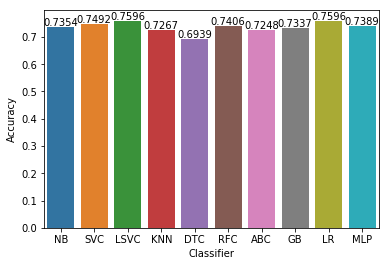

In [46]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

NB: 0.735390 (0.031151)
SVC: 0.749153 (0.047025)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

LSVC: 0.759649 (0.052024)
KNN: 0.726739 (0.058865)
DTC: 0.679855 (0.049394)
RFC: 0.709437 (0.073574)
ABC: 0.724803 (0.043336)
GB: 0.731942 (0.057368)
LR: 0.759649 (0.052024)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

MLP: 0.747580 (0.049965)


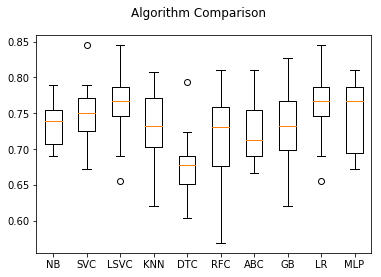

In [61]:
# evaluate each model in turn
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, sc_X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Phase 5 — Feature Engineering

https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c
Scikit Learn provided useful methods by which we can do feature selection and find out the importance of features which affect the model.

    Univariate Feature Selection : Statistical tests can be used to select those features that have the strongest relationship with the output variable.
    Recursive Feature Elimination : The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
    Principal Component Analysis : Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
    Feature Importance : Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

### Logistic Regression — Feature Selection

In [62]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

strat_k_fold = StratifiedKFold(n_splits=10, random_state=42)
logreg_model = LogisticRegression()

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(sc_X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

After fitting, it exposes an attribute grid_scores_ which returns a list of accuracy scores for each of the features selected. We can use that to plot a graph to see the no of features which gives the maximum accuracy for the given model.

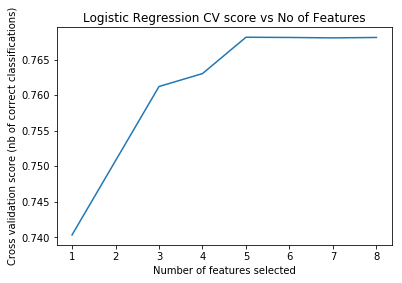

In [63]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

By looking at the plot we can see that inputting 4 features to the model gives the best accuracy score. RFECV exposes support_ which is another attribute to find out the features which contribute the most to predicting. In order to find out which features are selected we can use the following code.

In [64]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


We can see that the given features are the most suitable for predicting the response class. We can do a comparison of the model with original features and the RFECV selected features to see if there is an improvement in the accuracy scores.

In [66]:
# Calculate accuracy scores 
X_new = diabetes_clean_m3[new_features]

initial_score = cross_val_score(logreg_model, sc_X_train, y_train, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7681052426507532 
Accuracy after Feature Selection : 0.7816250241173066 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

### Gradient Boosting — Feature Selection

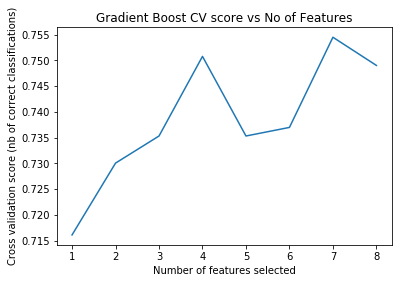

In [67]:

gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(sc_X_train, y_train)

plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [68]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [70]:
X_new_gb = diabetes_clean_m3[new_features]

initial_score = cross_val_score(gb_model, sc_X_train, y_train, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.745509961344038 
Accuracy after Feature Selection : 0.7554438120350719 


https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c

## Phase 6 — Model Parameter Tuning

## Using the GridSearchCV, which does an “exhaustive search over specified parameter values for an estimator”.
It is clearly a very handy tool, but comes with the price of computational cost when parameters to be searched are high.

    Important : When using the GridSearchCV, there are some models which have parameters that don’t work with each other. Since GridSearchCV uses combinations of all the parameters given, if two parameters don’t work with each other we will not be able to run the GridSearchCV.

    If that happens, a list of parameter grids can be provided to overcome the given issue. It is recommended that you read the class document of the which you are trying to fine tune, to find how parameters work with each other.

First we import GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model has some hyperparameters that doesn’t work with each other. Therefore we provide a list of grids with compatible parameters to fine tune the model. Through trial and error the following compatible parameters were found.

Logistic Regressions class document can be found here. <br>  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [72]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},

    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [73]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy')

grid.fit(X_new, y)

print(grid.best_params_)
print(grid.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [74]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7816250241173066 


We could conclude that the hyper parameter tuning didn’t increase it’s accuracy. Maybe the hyper parameters we chose weren’t indicative. However you are welcome to try adding more parameter combinations.The most important aspect is the procedure of doing hyper parameter tuning, not the result it self. In most cases hyper parameter tuning increases the accuracy.